# <center>Cleaning and Analyzing Employee Exit Surveys</center>

In this project, I will work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the [Technical and Further Education (TAFE) institute](https://en.wikipedia.org/wiki/Technical_and_further_education) in Queensland, Australia. You can find the TAFE exit survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

## INTRODUCTION <a id='intro'></a>
In this project, `cleaning` and `analysis` will be done on the two data sets in a bid to help certain stakeholders answer the following questions about their employees:
<a id='1stmarkdown'></a>
1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Although, a data dictionary wasn't provided with the dataset, below is a preview of a couple columns we'll work with from the `dete_survey.csv`:

Column_Name | Description
 :--------:  | :-------:
**ID** | An id used to identify the participant of the survey
**SeparationType** | The reason why the person's employment ended
**Cease Date** | The year or month the person's employment ended
**DETE Start Date** | The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the `tafe_survey.csv`:

Column_Name | Description
 :--------:  | :-------:
**Record ID** | An id used to identify the participant of the survey
**Reason for ceasing employment** | The reason why the person's employment ended
**LengthofServiceOverall. Overall Length of Service at Institute (in years)** | The length of the person's employment (in years)

### Exploring the Data sets

In [1]:
## Import necessary modules and read in the dataset
import numpy as np
import pandas as pd
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
# display first five rows of dete_survey data set
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
## display dete_survey data set infos
dete_survey.info()
print(dete_survey.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

The result from the code cell above gives certain infos as regards the `dete_survey` data set. It tell us:
- There are `822 rows` and `56 columns`
- The `ID`column is the only column stored as `int`
- Majority(37 of 56) of the columns are stored as `string objects`
- The `Career move to public sector` - `None of the above` are stored as `boolean` values
- Most columns contain missing values.

In [4]:
## display exact number of missing values in each column
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

The result from the code cell above shows:
- The `Classification`,`Business Unit`,`Aboriginal`,`Torres Strait`,`South Sea`,`Disability` and `NESB` columns contain a lot of missing values

In [5]:
# display first five rows of tafe_survey data set
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [6]:
## display tafe_survey data set infos
tafe_survey.info()
print(tafe_survey.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

The result from the code cell above gives certain infos as regards the dete_survey data set. It tell us:
- There are `702 rows` and `72 columns` are in data set
- The `Record ID` and `CESSATION YEAR` are the only columns stored as `floats` while others are stored as `string objects`
- There are columns with missing values

More details as regards the number of missing values in each column is displayed in the code cell below

In [7]:
## display exact number of missing values in each column
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

# <center>Data Cleaning</center>
## Identify Missing Values and Drop Unneccessary Columns
Exploring the data sets show:
* The `dete_survey` dataframe contains `'Not Stated'` values that indicate values are missing, but they aren't represented as NaN.
* Both the `dete_survey` and `tafe_survey` dataframes contain many columns that we don't need to complete the analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In the code cells below, the first two issues will be addressed.

In [8]:
# use the pd.read_csv() function to specify values that should be represented as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values = 'Not Stated')

#columns not needed for the analysis are dropped
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In the code cell above, the changes made to the data sets will make working with the data sets for analysis purpose, easier

## Rename Columns
Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns we'd like to use for our final analysis:

dete_survey_updated | tafe_survey_updated |	Definition
 :-----:   | :-------:  | :-----:
ID	| Record ID	| An id used to identify the participant of the survey
SeparationType| Reason for ceasing employment |The reason why the participant's employment ended
Cease Date |CESSATION YEAR	| The year or month the participant's employment ended
DETE Start Date	| | The year the participant began employment with the DETE
 | LengthofServiceOverall.Overall Length of Service at Institute (in years)|The length of the person's employment (in years)
Age|CurrentAge.Current Age | The age of the participant
Gender|Gender.What is your Gender? | The gender of the participant

Because, the data sets are eventually going to be combined, the column names will have to be standerdized. Lets take a peek at the `columns` in the `dete_survey_updated` data set in the code cell below

In [9]:
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In the code cell below:
- all capitalizations will be made lowercase 
- all spaces will be replaced with underscores

In [10]:
#rename columns in the dete_survey_updated dataframe
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ','_').str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [11]:
# rename concerned columns in the tafe_survey_updated data set
col_rename = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns = col_rename)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## Filter the Data
If we look at the unique values in the `separationtype` columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string `'Resignation'`.

In [12]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [13]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [15]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

The `dete_resignations` and `tafe_resignations` dataframes contain only data points with the `Resignation` value form the `seperationtype` column.

## Verify the data
Before we start cleaning and manipulating the rest of our data, let's verify that the data doesn't contain any major inconsistencies (to the best of our knowledge).

We'll verifying that the years in the cease_date and dete_start_date columns make sense.

* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [16]:
# display unique value counts in th cease_date column
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [17]:
# Extract and represent the data in a consistent format
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype('float64')
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [18]:
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [19]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

In [20]:
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   Institute                                            340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o

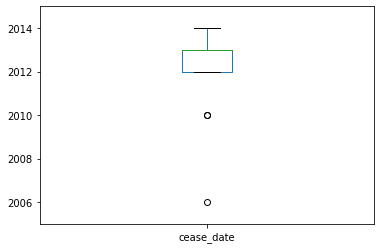

In [21]:
# %matplotlib inline

dete_resignations['cease_date'].plot(kind='box', ylim=(2005,2015))

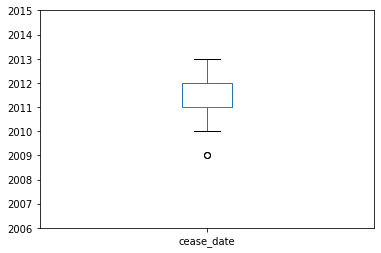

In [22]:
tafe_resignations['cease_date'].plot(kind='box', ylim=(2006,2015))

The result form the code cells helps us verify that the `date` columns from both data consists of reasonable values

In [23]:
# determinne the year span of each employee
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts()

5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
10.0     6
22.0     6
14.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
28.0     2
26.0     2
25.0     2
30.0     2
36.0     2
29.0     1
33.0     1
42.0     1
27.0     1
41.0     1
35.0     1
38.0     1
34.0     1
49.0     1
31.0     1
Name: institute_service, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [25]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

<a id='function'></a>

In [26]:
# Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.NaN
    else:
        return True
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

In [27]:
tafe_resignations_up['dissatisfied'].unique()

array([False, True, nan], dtype=object)

In [28]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(axis = 1, skipna =False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [29]:
# add a column to each dataframe that will allow us to easily distinguish between the two.
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [30]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

In [31]:
# drop columns with less than 300 notnull values
combined_updated = combined.dropna(thresh = 300, axis = 1).copy()
combined_updated.shape

(651, 42)

In [32]:
# Extract and represent values in a consistent format
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service_d'] = combined_updated['institute_service'].str.extract(r'(\d+)').astype('float')
combined_updated['institute_service_d'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_d, dtype: int64

In [33]:
# define function for better representation of data
def map_val(x):
    if pd.isnull(x):
        return np.nan
    elif x >= 11:
        return 'Veteran'
    elif 7 <= x <= 10:
        return 'Established'
    elif 3 <= x <= 6:
        return 'Experienced'
    else:
        return 'New'
    
combined_updated['service_cat'] = combined_updated['institute_service_d'].apply(map_val)
combined_updated['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

In [34]:
# replace missing values with the modal value(false)
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

# <center>Analysis</center>

In [35]:
to_plot = combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat')
to_plot

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


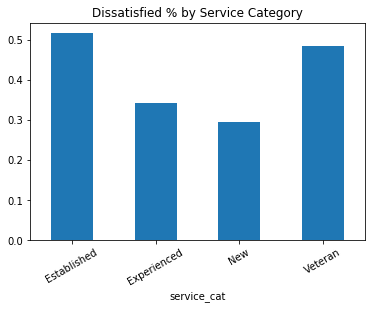

In [36]:
to_plot.plot(kind='bar', rot = 30, legend = False, title = 'Dissatisfied % by Service Category')

Most employees that resign due to some kind of dissatisfaction are the **Established(Over 11 years of service) and Veteran(7 - 10 years of service)** categories
* Approximately **51%** of Established employees
* Approximately **48%** of Veteran employees

[recall the question the analysis is to help us answer, from the introductory cell](#1stmarkdown)
<a id='?'></a>
The bar plot blot displayed above helps -to an extent- answer the first question.
* Both categories of employees mentioned in the question, resign due to some kind of dissatisfaction
* However, leaves us with the question, ***What is/are the contributing factor(s) -with reference to factors provided in the data- to their dissatisfaction?***

## Further Analysis
### Resignation due to some kind of dissatisfaction
We will analyse the major ccontributing factors to employees resignation. We will consider the given factors from each institue in our combined data sets.

`DETE Institute`:
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

`TAFE Institue`:
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

These factors are represented as columns in our data set, although they contain a alot of missing values. We will clean (fix the missing values) and aggregate them with the `service_cat` column

#### Cleaning `contributing factors` columns in `DETE`

In [37]:
# display column's unique value_counts info
print("Unique value_counts in Job dissatisfaction\n",combined_updated["job_dissatisfaction"].value_counts())

Unique value_counts in Job dissatisfaction
 False    270
True      41
Name: job_dissatisfaction, dtype: int64


In [38]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["job_dissatisfaction"]= combined_updated["job_dissatisfaction"].fillna(False)

combined_updated["job_dissatisfaction"].value_counts(dropna=False)

False    610
True      41
Name: job_dissatisfaction, dtype: int64

In [39]:
# display column's unique value_counts
print("Unique value_counts in dissatisfaction_with_the_department\n",combined_updated["dissatisfaction_with_the_department"].value_counts())

Unique value_counts in dissatisfaction_with_the_department
 False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64


In [40]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["dissatisfaction_with_the_department"]= combined_updated["dissatisfaction_with_the_department"].fillna(False)
combined_updated["dissatisfaction_with_the_department"].value_counts(dropna=False)

False    622
True      29
Name: dissatisfaction_with_the_department, dtype: int64

In [41]:
# display column's unique value_counts

print("Unique value_counts in physical_work_environment\n",combined_updated["physical_work_environment"].value_counts())

Unique value_counts in physical_work_environment
 False    305
True       6
Name: physical_work_environment, dtype: int64


In [42]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["physical_work_environment"]= combined_updated["physical_work_environment"].fillna(False)
combined_updated["physical_work_environment"].value_counts(dropna=False)

False    645
True       6
Name: physical_work_environment, dtype: int64

In [43]:
# display column's unique value_counts
print("Unique value_counts in lack_of_recognition\n",combined_updated["lack_of_recognition"].value_counts())

Unique value_counts in lack_of_recognition
 False    278
True      33
Name: lack_of_recognition, dtype: int64


In [44]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["lack_of_recognition"]= combined_updated["lack_of_recognition"].fillna(False)
combined_updated["lack_of_recognition"].value_counts(dropna=False)

False    618
True      33
Name: lack_of_recognition, dtype: int64

In [45]:
# display column's unique value_counts
print("Unique value_counts in lack_of_job_security\n",combined_updated["lack_of_job_security"].value_counts())

Unique value_counts in lack_of_job_security
 False    297
True      14
Name: lack_of_job_security, dtype: int64


In [46]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["lack_of_job_security"]= combined_updated["lack_of_job_security"].fillna(False)
combined_updated["lack_of_job_security"].value_counts(dropna=False)

False    637
True      14
Name: lack_of_job_security, dtype: int64

In [47]:
# display column's unique value_counts
print("Unique value_counts in work_location\n",combined_updated["work_location"].value_counts())

Unique value_counts in work_location
 False    293
True      18
Name: work_location, dtype: int64


In [48]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["work_location"]= combined_updated["work_location"].fillna(False)
combined_updated["work_location"].value_counts(dropna=False)

False    633
True      18
Name: work_location, dtype: int64

In [49]:
# display column's unique value_counts
print("Unique value_counts in employment_conditions\n",combined_updated["employment_conditions"].value_counts())

Unique value_counts in employment_conditions
 False    288
True      23
Name: employment_conditions, dtype: int64


In [50]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["employment_conditions"]= combined_updated["employment_conditions"].fillna(False)
combined_updated["employment_conditions"].value_counts(dropna=False)

False    628
True      23
Name: employment_conditions, dtype: int64

In [51]:
# display column's unique value_counts
print("Unique value_counts in work_life_balance\n",combined_updated["work_life_balance"].value_counts())

Unique value_counts in work_life_balance
 False    243
True      68
Name: work_life_balance, dtype: int64


In [52]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["work_life_balance"]= combined_updated["work_life_balance"].fillna(False)
combined_updated["work_life_balance"].value_counts(dropna=False)

False    583
True      68
Name: work_life_balance, dtype: int64

In [53]:
# display column's unique value_counts
print("Unique value_counts in workload\n",combined_updated["workload"].value_counts())

Unique value_counts in workload
 False    284
True      27
Name: workload, dtype: int64


In [54]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["workload"]= combined_updated["workload"].fillna(False)
combined_updated["workload"].value_counts(dropna=False)

False    624
True      27
Name: workload, dtype: int64

### Cleaning `contributing factors` columns in `TAFE`
As part of this cleaning process, we will refer back to the [function](#function) we created earlier - `update_vals`

In [55]:
# update the missing values using the `update_vals()` function we created earlier
combined_updated[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']] = (
combined_updated[['Contributing Factors. Job Dissatisfaction', 'Contributing Factors. Dissatisfaction']]
    .applymap(update_vals))

# display column's unique value_counts
print('Unique value counts in Contributing Factors. Job Dissatisfaction\n',combined_updated['Contributing Factors. Job Dissatisfaction'].value_counts())

Unique value counts in Contributing Factors. Job Dissatisfaction
 False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [56]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["Contributing Factors. Job Dissatisfaction"]= combined_updated["Contributing Factors. Job Dissatisfaction"].fillna(False)
combined_updated["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

False    589
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [57]:
# display column's unique value_counts
print('Unique value counts in Contributing Factors. Dissatisfaction\n',combined_updated['Contributing Factors. Dissatisfaction'].value_counts())

Unique value counts in Contributing Factors. Dissatisfaction
 False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64


In [58]:
# replace missing values with the value that occurs most frequently in this column
combined_updated["Contributing Factors. Dissatisfaction"]= combined_updated["Contributing Factors. Dissatisfaction"].fillna(False)
combined_updated["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

False    596
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In a bid to aggregate the `contributing factors` factors column, we had to clean the different columns involved, In the code cells above, we:
- displayed the unique value counts in each column so as to decide the modal value(value that occured most)
- replaced the missing values in each column with their modal values

However, since the `job dissatisfaction` and `Contributing Factors. Job Dissatisfaction` columns of the DETE and TAFE data sets communicate thesame factors, we will combine the two columns in the code cell below.

In [59]:
combined_updated["DETE-TAFE Combined job_dissatisfaction"] = combined_updated[['job_dissatisfaction',
        'Contributing Factors. Job Dissatisfaction']].any(axis=1, skipna=False)
 
combined_updated["DETE-TAFE Combined job_dissatisfaction"].value_counts()

False    548
True     103
Name: DETE-TAFE Combined job_dissatisfaction, dtype: int64

Now that we have cleaned the missing values, let's aggregate by the `service_cat` column using a `pivot_table` and analyse the results.

In [60]:
cols=[ 'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload','DETE-TAFE Combined job_dissatisfaction','Contributing Factors. Dissatisfaction']

dissatisfaction_result = combined_updated.pivot_table(index='service_cat', values=cols)
dissatisfaction_result

,Contributing Factors. Dissatisfaction,DETE-TAFE Combined job_dissatisfaction,dissatisfaction_with_the_department,employment_conditions,lack_of_job_security,lack_of_recognition,physical_work_environment,work_life_balance,work_location,workload
service_cat,,,,,,,,,,
Established,0.048387,0.225806,0.096774,0.064516,0.016129,0.112903,0.016129,0.161290,0.112903,0.064516
Experienced,0.087209,0.151163,0.040698,0.034884,0.017442,0.052326,0.017442,0.081395,0.029070,0.034884
New,0.082902,0.160622,0.005181,0.010363,0.010363,0.010363,0.005181,0.072539,0.005181,0.015544
Veteran,0.066176,0.161765,0.102941,0.051471,0.051471,0.073529,0.007353,0.183824,0.029412,0.080882


Now, let us `visualize` the data

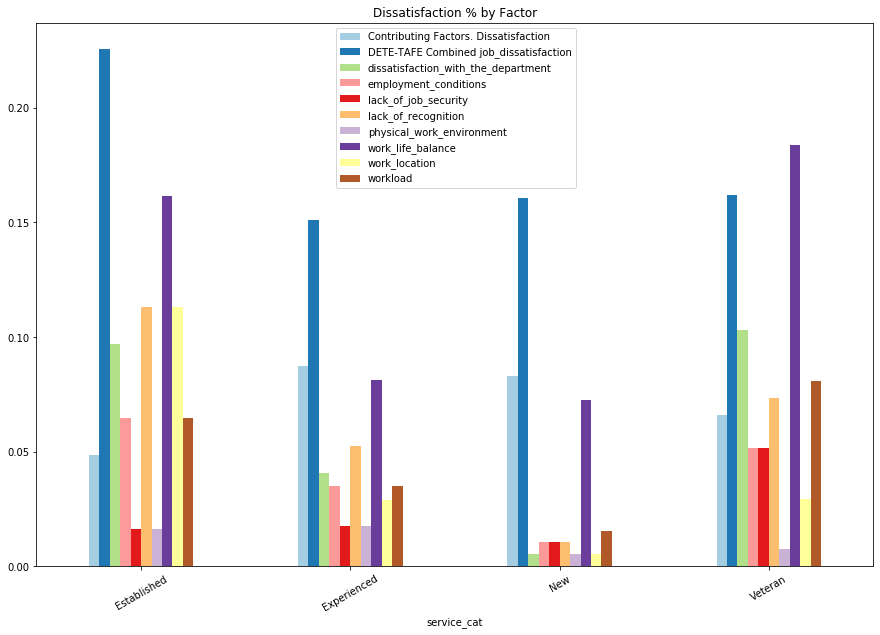

In [61]:
dissatisfaction_result.plot(kind='bar',title = 'Dissatisfaction % by Factor', rot=30,figsize=(15,10),colormap='Paired').legend(bbox_to_anchor=(0.65, 1))

[Recall](#?),the question that led to our further analysis.

From the we plot, we can say that:
- For the `DETE institue`, `general job dissatisfaction` and `work_life_balance` are the major `contributing factors` for both employees with few and longer years of service.
- For the `TAFE institute`, `general job dissatisfaction` is the major `contributing factor` for both employees with few and longer years of service.

 ### Employee dissatisfaction by Age
 [Recall](#1stmarkdown), the second question to be answered in this analysis
 In a bid to answer this question, we will aggregate `age` column with the different `contributing factors` column, but we need to clean the `age` column first.

In [62]:
# check unique values in age column
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
26  30           32
36  40           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

There are missing values in this column and the data representation is inconsistent.
Based on the result from the code cell above, we will perform the following cleaning steps:
- Create a consistent representation of the data
- Store the values in this column as `float` objects
- replace the missing values with the `mean` age 

In [63]:
# use regex to create a consistent representation of data
combined_updated['age'] = combined_updated['age'].astype('str').str.extract(r'(\d+)')
combined_updated['age']= combined_updated['age'].astype('float')

#replace missing values with mean age
combined_updated['age'] = combined_updated['age'].fillna(int(combined_updated['age'].mean()))

#verify changes
combined_updated['age'].value_counts(dropna=False)

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
39.0    55
56.0    55
61.0    23
20.0    10
Name: age, dtype: int64

For proper and better `visualization` of data:
- Create a new column to reprepent the various age groups

In [64]:
# define a function to represent the various age groups and apply to the age column
def age_update(x):
    if x >= 60:
        return '60 plus'
    elif 55 <= x <= 59:
        return '55-59'
    elif 50 <= x <= 54:
        return '50-54'
    elif 45 <= x <= 49:
        return '45-49'
    elif 40 <= x <= 44:
        return '40-44'
    elif 35 <= x <= 39:
        return '35-39'
    elif 30 <= x <= 34:
        return '30-34'
    elif 25 <= x <= 29:
        return '25-29'
    else:
        return 'Less than 25'
    
combined_updated['age_updated']= combined_updated['age'].apply(age_update)
combined_updated['age_updated'].value_counts()

35-39           128
40-44            93
45-49            81
Less than 25     72
50-54            71
25-29            67
30-34            61
55-59            55
60 plus          23
Name: age_updated, dtype: int64

Since, the cleaning process is done and the `age` column has been updated, we will aggregate the `age_updated` column by the different `contributing factors` column.

In [65]:
cols=[ 'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload','DETE-TAFE Combined job_dissatisfaction','Contributing Factors. Dissatisfaction']

# create a pivot table to aggregate data
age_group = combined_updated.pivot_table(values = cols, index = 'age_updated')
age_group

,Contributing Factors. Dissatisfaction,DETE-TAFE Combined job_dissatisfaction,dissatisfaction_with_the_department,employment_conditions,lack_of_job_security,lack_of_recognition,physical_work_environment,work_life_balance,work_location,workload
age_updated,,,,,,,,,,
25-29,0.059701,0.194030,0.044776,0.074627,0.029851,0.089552,0.029851,0.074627,0.074627,0.059701
30-34,0.081967,0.180328,0.065574,0.032787,0.000000,0.032787,0.000000,0.131148,0.049180,0.016393
35-39,0.132812,0.132812,0.031250,0.023438,0.007812,0.015625,0.015625,0.062500,0.015625,0.031250
40-44,0.075269,0.129032,0.032258,0.043011,0.021505,0.053763,0.010753,0.129032,0.043011,0.021505
45-49,0.074074,0.148148,0.037037,0.037037,0.061728,0.049383,0.000000,0.111111,0.012346,0.037037
50-54,0.098592,0.239437,0.084507,0.028169,0.042254,0.056338,0.000000,0.140845,0.000000,0.056338
55-59,0.072727,0.072727,0.072727,0.018182,0.018182,0.072727,0.018182,0.127273,0.000000,0.090909
60 plus,0.000000,0.260870,0.043478,0.086957,0.000000,0.043478,0.000000,0.130435,0.086957,0.130435
Less than 25,0.069444,0.152778,0.013889,0.013889,0.000000,0.069444,0.000000,0.083333,0.013889,0.013889


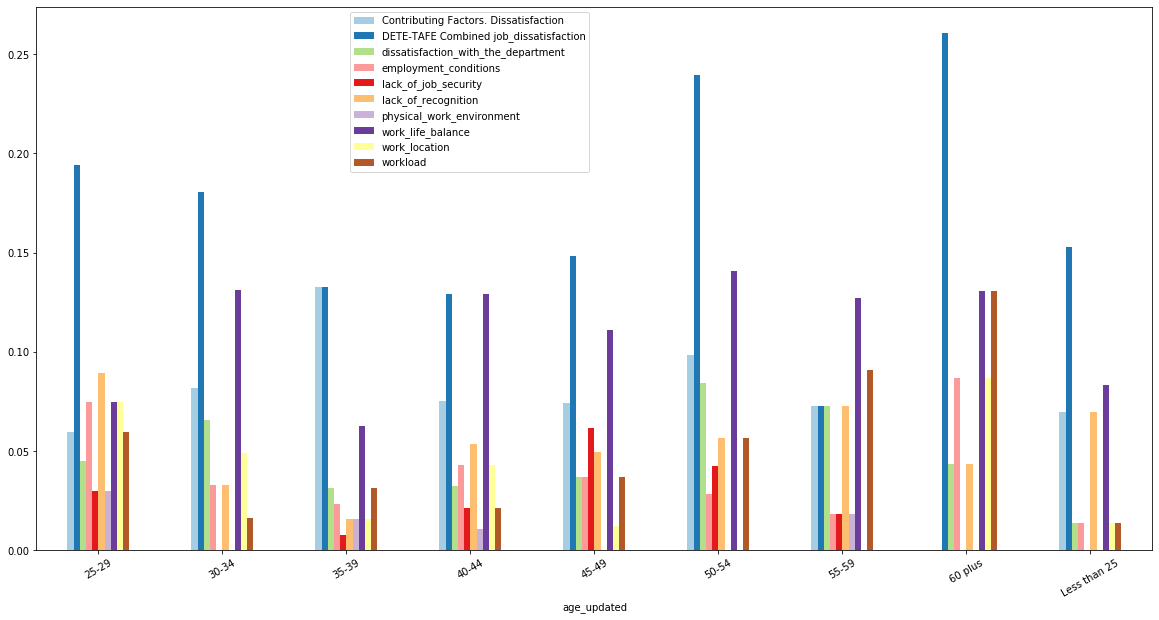

In [66]:
age_group.plot(kind = 'bar', rot = 30, figsize = (20,10), colormap = 'Paired').legend(bbox_to_anchor = (0.5,1))

Over 25% of the older employees resign because of general dissatisfaction with their jobs, the trend is thesame for the younger employees too.

#  <center>CONCLUSIONS</center>
As earlier stated in the [introduction](#intro) of this project, we have been able to answer the posed questions:
#### First question (YES)
- For the DETE institue, `general job dissatisfaction` and `work_life_balance` are the major contributing factors for both employees with few(`New`) and longer(`Veteran` and `Established`) years of service.
- For the TAFE institute, `general job dissatisfaction` is the major contributing factor for both employees with few and longer years of service.

#### Second question(YES)
For the DETE institue:
- Older employees resign majorly due to `General dissatisfaction`, `Workload` and `Work_balance_life`
- Younger employees resign majorly due to `General dissatisfaction` and `Workload`

For the TAFE institute:
Both old and young employees resign due to `General dissatisfaction` with their jobs